In [1]:
#Import the dependencies.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
#import the requests library.
import requests

#import the api key
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [2]:
# Create a set of random latitude and longitude combinations.
lats=np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs=np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs=zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-67.55357522703446 -178.6898008870198
77.77308679851643 41.240568152204986
-34.64372243365793 48.32269664963104
-33.78577206835558 51.76672834036145
76.69397547469092 -42.820277868181336
67.5501063553811 -125.69962655812017
54.92589208551655 -159.0011918473964
-1.8597693920211213 -148.504733400065
61.072043073935134 53.58698787687979
-82.95866974071016 -132.96957038786323
-2.904118495212984 135.0715402276051
10.480885367148346 -114.39642699815263
-61.85875406782701 113.40769858976262
-34.34936284975277 86.14503045530518
31.919117324714392 24.596484171602583
-12.97497779528463 59.720885771286504
-29.930377741761205 91.72610338119603
77.7203613081565 -36.269099636815554
66.07403125908041 71.00760908397362
-14.167722778242108 22.413173381175596
78.62813358872103 -16.94735732648141
71.73653516321897 -148.83243484270525
46.008956812081124 115.44537472801187
80.28541188416995 -138.15612121193647
58.402509804404474 164.19622791048545
-85.35064247999422 50.29411945032919
-79.6779776133317 1.72

44.827238163576254 -17.041216711594387
-31.85318426537934 -176.10109466797377
-14.989820747429334 22.659962221574062
-72.26750836244818 -178.7740954321392
-11.345643200189414 -37.332955645621496
0.5751623401205563 -122.07737890305712
54.144167419850675 -167.22215975270967
4.237636223646689 98.30736992360937
27.598045354856936 150.6115406366348
-65.79367893671078 -148.02919538030645
18.836203321638237 94.91152825945869
-53.23944243612096 -23.568115446134243
-8.524106083091041 24.1743880024151
89.47586102264219 160.16326964323503
61.45429180174503 108.39965621087413
-58.66444998201941 15.723715728910463
38.16669430555123 130.03196860893308
-16.26474891388608 124.06310363205637
-13.823798652824522 -33.91207142958646
48.96999673615565 19.848424361885094
-20.785089166589373 -57.47957906864302
-38.053150424782224 91.11512536256976
24.165544488620384 123.53850547184015


In [5]:
from citipy import citipy


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [7]:
# Create a list for holding the cities.
city_data = []

# Create Counters and set them to 1
record_count=1
set_count=1

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 400 == 0 and i >= 400):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | ostrovnoy
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | ilulissat
Processing Record 5 of Set 1 | norman wells
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | ust-kulom
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | nabire
Processing Record 11 of Set 1 | san patricio
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | geraldton
Processing Record 14 of Set 1 | bardiyah
Processing Record 15 of Set 1 | cap malheureux
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | tasiilaq
Processing Record 18 of Set 1 | yar-sale
Processing Record 19 of Set 1 | kalabo
Processing Record 20 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 21 of Set 1 | college
Processing Record 22 of Set 1 | baruun-urt
Processing Record 23 of Set 1 | tukt

Processing Record 184 of Set 1 | lazaro cardenas
Processing Record 185 of Set 1 | resistencia
Processing Record 186 of Set 1 | karratha
Processing Record 187 of Set 1 | tromso
Processing Record 188 of Set 1 | port blair
Processing Record 189 of Set 1 | hithadhoo
Processing Record 190 of Set 1 | uige
Processing Record 191 of Set 1 | chernihiv
Processing Record 192 of Set 1 | kaeo
Processing Record 193 of Set 1 | fuxin
Processing Record 194 of Set 1 | severnyy
Processing Record 195 of Set 1 | vikhorevka
Processing Record 196 of Set 1 | kimberley
Processing Record 197 of Set 1 | khani
Processing Record 198 of Set 1 | boyolangu
Processing Record 199 of Set 1 | mocambique
City not found. Skipping...
Processing Record 200 of Set 1 | leon
Processing Record 201 of Set 1 | chernyshevskiy
Processing Record 202 of Set 1 | boa vista
Processing Record 203 of Set 1 | porto velho
Processing Record 204 of Set 1 | nishihara
Processing Record 205 of Set 1 | cockburn town
Processing Record 206 of Set 1 |

Processing Record 373 of Set 1 | riyadh
Processing Record 374 of Set 1 | koroni
Processing Record 375 of Set 1 | wakkanai
Processing Record 376 of Set 1 | luderitz
Processing Record 377 of Set 1 | fort myers beach
Processing Record 378 of Set 1 | fort wellington
Processing Record 379 of Set 1 | itoman
Processing Record 380 of Set 1 | mehamn
Processing Record 381 of Set 1 | stantsiya gorchakovo
City not found. Skipping...
Processing Record 382 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 383 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 384 of Set 1 | toulepleu
City not found. Skipping...
Processing Record 385 of Set 1 | jiuquan
Processing Record 386 of Set 1 | kaduna
Processing Record 387 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 388 of Set 1 | kudahuvadhoo
Processing Record 389 of Set 1 | wewak
Processing Record 390 of Set 1 | grand centre
City not found. Skipping...
Processing Record 391 of Set 1 | nuu

Processing Record 161 of Set 2 | port hardy
Processing Record 162 of Set 2 | sanford
Processing Record 163 of Set 2 | tabiauea
City not found. Skipping...
Processing Record 164 of Set 2 | tiarei
Processing Record 165 of Set 2 | graaff-reinet
Processing Record 166 of Set 2 | rio grande
Processing Record 167 of Set 2 | sosnogorsk
Processing Record 168 of Set 2 | northam
Processing Record 169 of Set 2 | gao
Processing Record 170 of Set 2 | mandalgovi
Processing Record 171 of Set 2 | bibbiena
Processing Record 172 of Set 2 | fort saint james
Processing Record 173 of Set 2 | dustlik
Processing Record 174 of Set 2 | pangnirtung
Processing Record 175 of Set 2 | santa fe
Processing Record 176 of Set 2 | estelle
Processing Record 177 of Set 2 | quimper
Processing Record 178 of Set 2 | karatau
Processing Record 179 of Set 2 | orocue
Processing Record 180 of Set 2 | tadine
Processing Record 181 of Set 2 | san quintin
Processing Record 182 of Set 2 | salta
Processing Record 183 of Set 2 | yulara
P

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,80.76,78,20,11.50,TO,2022-10-13 01:08:07
1,Ostrovnoy,68.0531,39.5131,37.13,90,9,13.04,RU,2022-10-13 01:13:34
2,Ilulissat,69.2167,-51.1000,28.42,64,100,5.75,GL,2022-10-13 01:06:48
3,Norman Wells,65.2820,-126.8329,26.19,87,73,4.47,CA,2022-10-13 01:14:40
4,Bethel,41.3712,-73.4140,61.16,82,0,5.75,US,2022-10-13 01:10:59
5,Atuona,-9.8000,-139.0333,77.36,77,16,19.19,PF,2022-10-13 01:07:55
6,Ust-Kulom,61.6864,53.6902,41.20,92,100,2.68,RU,2022-10-13 01:14:40
7,Rikitea,-23.1203,-134.9692,69.04,62,0,14.09,PF,2022-10-13 01:07:53
8,Nabire,-3.3667,135.4833,83.55,74,95,3.71,ID,2022-10-13 01:14:41
9,San Patricio,28.0170,-97.5169,84.29,71,11,4.88,US,2022-10-13 01:09:42


In [10]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2022-10-13 01:08:07,-21.2000,-175.2000,80.76,78,20,11.50
1,Ostrovnoy,RU,2022-10-13 01:13:34,68.0531,39.5131,37.13,90,9,13.04
2,Ilulissat,GL,2022-10-13 01:06:48,69.2167,-51.1000,28.42,64,100,5.75
3,Norman Wells,CA,2022-10-13 01:14:40,65.2820,-126.8329,26.19,87,73,4.47
4,Bethel,US,2022-10-13 01:10:59,41.3712,-73.4140,61.16,82,0,5.75
...,...,...,...,...,...,...,...,...,...
572,Yerbogachen,RU,2022-10-13 01:18:39,61.2767,108.0108,32.65,90,100,7.87
573,Broome,US,2022-10-13 01:18:40,42.2506,-75.8330,61.14,74,20,11.50
574,Liptovsky Hradok,SK,2022-10-13 01:18:40,49.0396,19.7234,43.97,92,12,1.63
575,Fuerte Olimpo,PY,2022-10-13 01:18:40,-21.0415,-57.8738,65.66,97,99,3.04


In [11]:
#Create the output file (CSV)
output_data_file="weather_data/cities.csv"
#export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/12/22'

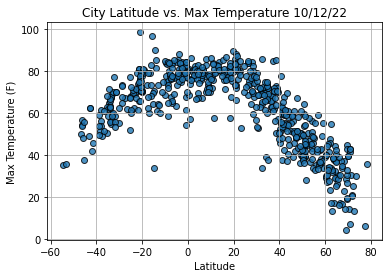

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig1.png",dpi = 300, bbox_inches="tight")

# Show plot.
plt.show()

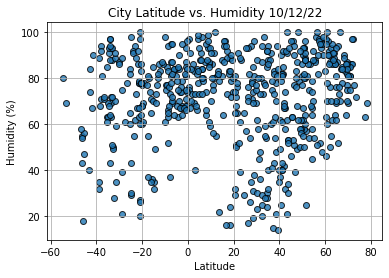

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png",dpi = 300, bbox_inches="tight")

# Show plot.
plt.show()

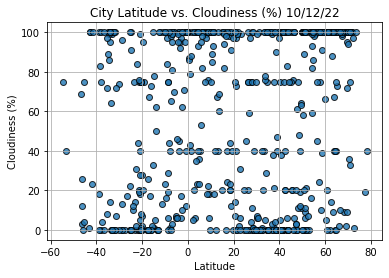

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png",dpi = 300, bbox_inches="tight")
# Show plot.
plt.show()

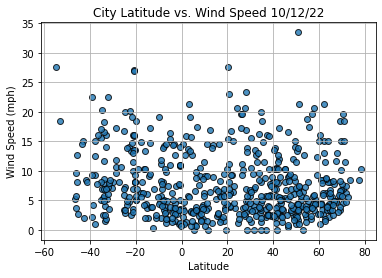

In [35]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png",dpi = 300, bbox_inches="tight")

# Show plot.
plt.show()

In [36]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [37]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Ostrovnoy,RU,2022-10-13 01:13:34,68.0531,39.5131,37.13,90,9,13.04
2,Ilulissat,GL,2022-10-13 01:06:48,69.2167,-51.1000,28.42,64,100,5.75
3,Norman Wells,CA,2022-10-13 01:14:40,65.2820,-126.8329,26.19,87,73,4.47
4,Bethel,US,2022-10-13 01:10:59,41.3712,-73.4140,61.16,82,0,5.75
6,Ust-Kulom,RU,2022-10-13 01:14:40,61.6864,53.6902,41.20,92,100,2.68


In [38]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

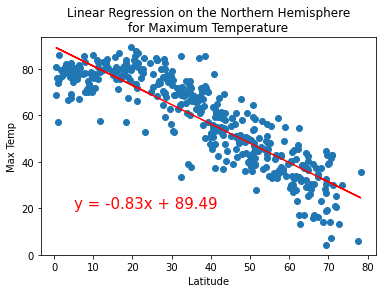

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 'Max Temp',(5,20))

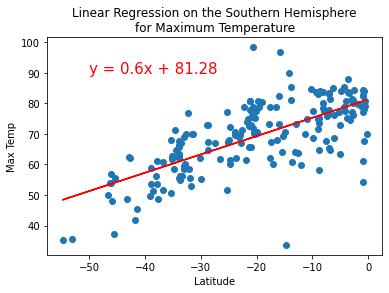

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature', 'Max Temp',(-50,90))

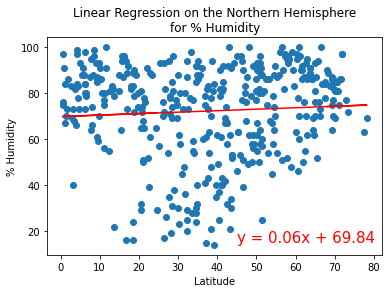

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       """Linear Regression on the Northern Hemisphere\nfor % Humidity""", '% Humidity',(45,15))

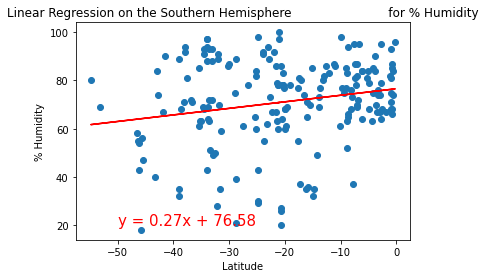

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,20))

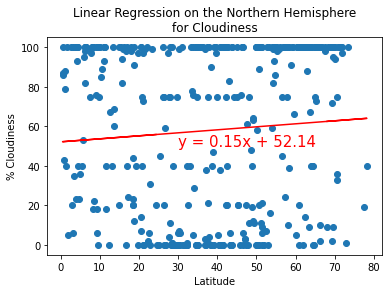

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       """Linear Regression on the Northern Hemisphere\nfor Cloudiness""", '% Cloudiness',(30,50))

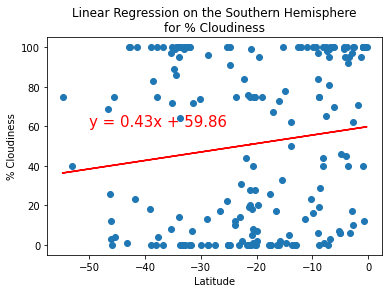

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Cloudiness', '% Cloudiness',(-50,60))

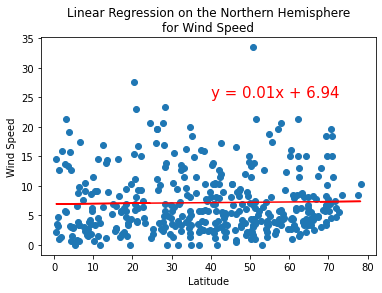

In [81]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 'Wind Speed',(40,25))

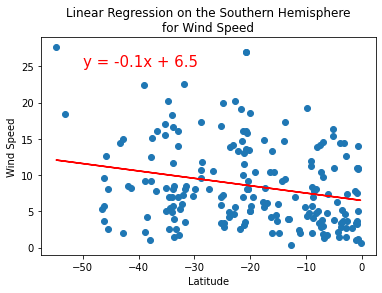

In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Wind Speed', 'Wind Speed',(-50,25))